<a href="https://colab.research.google.com/github/BountyHunter1999/Learning-PyTorch-Notebooks/blob/main/3_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1) Load in the data

### our goal with the data:
- to predict whether a patient's diagnosis of breast tissue is malignant or benign

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
# load the data
data = load_breast_cancer()

In [4]:
# check the type of `data`
type(data) 

sklearn.utils.Bunch

In [5]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can trat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [7]:
# targets
data.target
# now how the targests are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [10]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
# imports should all be at the top PEP-8
# but as we're learning, here it helps to create a story 
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
N, D = X_train.shape 

In [33]:
X_train.shape  # no. of samples, no. of features 

(381, 30)

Why we scale the data?
- because the output is a linear combination of the input so we don't want one input have a very larger range and another inputer a very small range
- if this happens then the weights will be too sensitive when the input has a large range and not sensitive enough when the input has a small range

SOLUTION:
- typical way to deal with this is a normalization or standardization
  -- subtracting the mean and dividing by the standard deviation 

In [34]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2) Create the model


In [35]:
# Now all the fun PyTorch stuff
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid() 
)

In [36]:
# Loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [37]:
y_test.shape

(188,)

In [38]:
# Convert data into torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [39]:
y_test.shape

torch.Size([188, 1])

# 3) Train the model

In [40]:
# train the model
n_epochs = 1000

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it + 1) % 50 == 0:
    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item()}")



Epoch 50/1000, Train Loss: 0.5939, Test Loss: 0.5907420516014099
Epoch 100/1000, Train Loss: 0.4168, Test Loss: 0.4184187352657318
Epoch 150/1000, Train Loss: 0.3274, Test Loss: 0.3313586413860321
Epoch 200/1000, Train Loss: 0.2744, Test Loss: 0.2789739966392517
Epoch 250/1000, Train Loss: 0.2390, Test Loss: 0.24348928034305573
Epoch 300/1000, Train Loss: 0.2136, Test Loss: 0.21762187778949738
Epoch 350/1000, Train Loss: 0.1944, Test Loss: 0.19783180952072144
Epoch 400/1000, Train Loss: 0.1794, Test Loss: 0.1821630299091339
Epoch 450/1000, Train Loss: 0.1674, Test Loss: 0.16942976415157318
Epoch 500/1000, Train Loss: 0.1575, Test Loss: 0.15886473655700684
Epoch 550/1000, Train Loss: 0.1493, Test Loss: 0.1499476432800293
Epoch 600/1000, Train Loss: 0.1423, Test Loss: 0.14231295883655548
Epoch 650/1000, Train Loss: 0.1362, Test Loss: 0.1356964111328125
Epoch 700/1000, Train Loss: 0.1309, Test Loss: 0.1299021691083908
Epoch 750/1000, Train Loss: 0.1263, Test Loss: 0.12478217482566833
Epoc

if test loss was increasing- meaning we're overfitting our model

# 4) Evaluate the model

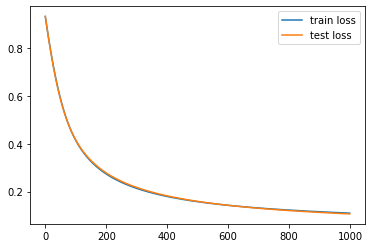

In [42]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

# train loss is not so different from the test loss
# so the model isn't overfitting

In [43]:
# Get accuracy
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())  # torch tensor to numpy, then to 0 and 1 
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")


Train acc: 0.9816, Test acc: 0.9840


# EXERCISE:
recording the accuracy on interation

In [48]:
# Build the model
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid() 
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [49]:
# train the model
n_epochs = 1000

# stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

train_acc = np.zeros(n_epochs)
test_acc = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Get test loss
  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  # Save losses
  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  # Save Accuracy
  train_acc[it] = np.mean(np.round(outputs.detach().numpy()) == y_train.numpy())
  test_acc[it] = np.mean(np.round(outputs_test.detach().numpy()) == y_test.numpy())

  if (it + 1) % 50 == 0:
    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item()}, Train acc: {train_acc[it]:.4f}, Test acc: {test_acc[it]}")

Epoch 50/1000, Train Loss: 0.3995, Test Loss: 0.4107127785682678, Train acc: 0.8740, Test acc: 0.8776595744680851
Epoch 100/1000, Train Loss: 0.3102, Test Loss: 0.31957828998565674, Train acc: 0.9108, Test acc: 0.9202127659574468
Epoch 150/1000, Train Loss: 0.2567, Test Loss: 0.2645703852176666, Train acc: 0.9318, Test acc: 0.9308510638297872
Epoch 200/1000, Train Loss: 0.2208, Test Loss: 0.2272127866744995, Train acc: 0.9449, Test acc: 0.9468085106382979
Epoch 250/1000, Train Loss: 0.1951, Test Loss: 0.20019835233688354, Train acc: 0.9580, Test acc: 0.9521276595744681
Epoch 300/1000, Train Loss: 0.1760, Test Loss: 0.1798364520072937, Train acc: 0.9606, Test acc: 0.9521276595744681
Epoch 350/1000, Train Loss: 0.1612, Test Loss: 0.16397671401500702, Train acc: 0.9711, Test acc: 0.9521276595744681
Epoch 400/1000, Train Loss: 0.1496, Test Loss: 0.15128064155578613, Train acc: 0.9738, Test acc: 0.9574468085106383
Epoch 450/1000, Train Loss: 0.1401, Test Loss: 0.1408829540014267, Train acc:

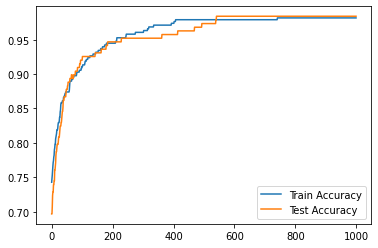

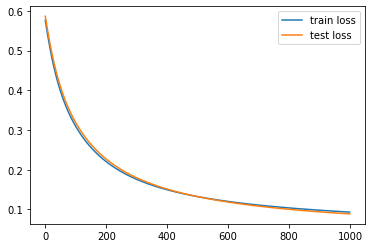

In [56]:
# plotting train and test accuracy per iteration

plt.plot(train_acc, label="Train Accuracy")
plt.plot(test_acc, label="Test Accuracy")
plt.legend()
plt.show()

# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()


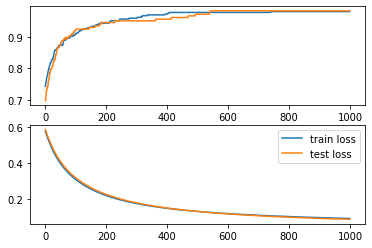

In [54]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(train_acc, label="Train Accuracy")
ax[0].plot(test_acc, label="Test Accuracy")

# Plot the train loss and test loss per iteration
ax[1].plot(train_losses, label='train loss')
ax[1].plot(test_losses, label='test loss')
plt.legend()
plt.show()


# Save and Load Model

In [57]:
# look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5134, -0.4045, -0.3889, -0.3437, -0.1074, -0.1694, -0.5398, -0.4125,
                       -0.0236,  0.3230, -0.4369, -0.1178, -0.2329, -0.3977, -0.0826,  0.2278,
                        0.1232, -0.2903,  0.3555,  0.3751, -0.2314, -0.4372, -0.4416, -0.4815,
                       -0.4950, -0.0875, -0.4749, -0.2425, -0.6626, -0.1340]])),
             ('0.bias', tensor([0.3232]))])

In [60]:
# save the model
torch.save(model.state_dict(), 'mymodel.pt')

In [61]:
!ls

mymodel.pt  sample_data


In [62]:
# Load the model
# Note: this makes more sense and is more compact when
# your model is a big class, as we will be seeing later 
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load('mymodel.pt'))

<All keys matched successfully>

In [63]:
# Evaluate the new model
# Results will be the same
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())  # torch tensor to numpy, then to 0 and 1 
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9816, Test acc: 0.9840


In [64]:
# Download the model
from google.colab import files
files.download('mymodel.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>